In [ ]:
data = pd.read_csv('sampling_8Q.csv')
data.columns

Index(['Unnamed: 0', 'BAS_YH', 'SEQ', 'AGE', 'SEX_CD', 'MBR_RK', 'ATT_YM',
       'HOUS_SIDO_NM', 'DIGT_CHNL_REG_YN', 'DIGT_CHNL_USE_YN', 'LIFE_STAGE',
       'TOT_USE_AM', 'CRDSL_USE_AM', 'CNF_USE_AM', 'INTERIOR_AM', 'INSUHOS_AM',
       'OFFEDU_AM', 'TRVLEC_AM', 'FSBZ_AM', 'SVCARC_AM', 'DIST_AM',
       'PLSANIT_AM', 'CLOTHGDS_AM', 'AUTO_AM', 'BAS_YH_numeric', 'ASSETS',
       'DEBT', 'INCOME', 'BAS_YH_year', 'UES_INCOME', 'CRDSL_DEP', 'DAN_RT',
       'ATT_PERIOD', 'DEBT_RATIO', 'LIFE_STAGE_DAN'],
      dtype='object')

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('sampling_8Q.csv')

# Add a new column 'risk_score' based on the condition
data['risk_score'] = data['TRVLEC_AM'].apply(lambda x: '불량' if x >= 119.41 else '우량')

# 소득 대비 소비 = 총 소비 / 소득
data['UES_INCOME'] = data['TOT_USE_AM'] / data['INCOME']

# 신용카드 의존도 = 신용카드 소비 / 총소비
data['CRDSL_DEP'] = data['CRDSL_USE_AM'] / data['TOT_USE_AM']

# 위험소비비율 = 대분류 중 위험 소비 / 총소비
data['DAN_RT'] = (data['TRVLEC_AM'] + data['CLOTHGDS_AM'] + data['AUTO_AM']) / data['TOT_USE_AM']

# 가입연수 = 2024 - 가입년도 + 1
data['ATT_YM'] = data['ATT_YM'].astype(str)
data['ATT_PERIOD'] = 2024 - data['ATT_YM'].str[:4].astype(int) + 1

# 부채 비율 = 부채총계 / 자본 총계
data['DEBT_RATIO'] = data['DEBT'] / data['ASSETS']

# Save the modified dataset
data.to_csv('labeled_sampling_8Q.csv', index=False)


In [ ]:
# 데이터 로드
data2 = pd.read_csv('labeled_sampling_8Q.csv')

# 'Unnamed'로 시작하는 열 제거
data2 = data2.loc[:, ~data2.columns.str.startswith('Unnamed')]

# 열 이름 출력
print(data2.columns)

Index(['BAS_YH', 'SEQ', 'AGE', 'SEX_CD', 'MBR_RK', 'ATT_YM', 'HOUS_SIDO_NM',
       'DIGT_CHNL_REG_YN', 'DIGT_CHNL_USE_YN', 'LIFE_STAGE', 'TOT_USE_AM',
       'CRDSL_USE_AM', 'CNF_USE_AM', 'INTERIOR_AM', 'INSUHOS_AM', 'OFFEDU_AM',
       'TRVLEC_AM', 'FSBZ_AM', 'SVCARC_AM', 'DIST_AM', 'PLSANIT_AM',
       'CLOTHGDS_AM', 'AUTO_AM', 'BAS_YH_numeric', 'ASSETS', 'DEBT', 'INCOME',
       'BAS_YH_year', 'UES_INCOME', 'CRDSL_DEP', 'DAN_RT', 'ATT_PERIOD',
       'DEBT_RATIO', 'LIFE_STAGE_DAN', 'risk_score'],
      dtype='object')


In [ ]:
# 제외 리스트(파생변수 + asset, debt)
# asset, debt는 다중공산성 때문에 dept/ratio로 갈음
derived_features = ['UES_INCOME', 'CRDSL_DEP', 'DAN_RT', 'ATT_PERIOD', 'ATT_YM', 'ATT_PERIOD', 'DEBT', 'ASSETS']


# 기존 데이터에서 파생변수 제거
data_without_derived = data2.drop(columns=derived_features)

# ID성 컬럼과 원본 BAS_YH 제거 (이전 전처리와 동일하게)
columns_to_drop = ['SEQ', 'BAS_YH']
data_processed = data_without_derived.drop(columns=columns_to_drop)

# 범주형 변수 원핫 인코딩
categorical_columns = ['HOUS_SIDO_NM', 'DIGT_CHNL_REG_YN', 'DIGT_CHNL_USE_YN', 'LIFE_STAGE']
data_encoded = pd.get_dummies(data_processed,
                            columns=categorical_columns,
                            prefix=categorical_columns,
                            prefix_sep='_')

# risk_score 이진값으로 변환
data_encoded['risk_score'] = (data_encoded['risk_score'] == '불량').astype(int)

# 결과 확인
print("전체 컬럼 수:", len(data_encoded.columns))
print("\n제거된 파생변수:", derived_features)
print("\n남은 컬럼 목록:")
for i, column in enumerate(data_encoded.columns, 1):
    print(f"{i}. {column}")

# 데이터 형태 확인
print("\n데이터 형태:", data_encoded.shape)

전체 컬럼 수: 52

제거된 파생변수: ['UES_INCOME', 'CRDSL_DEP', 'DAN_RT', 'ATT_PERIOD', 'ATT_YM', 'ATT_PERIOD', 'DEBT', 'ASSETS']

남은 컬럼 목록:
1. AGE
2. SEX_CD
3. MBR_RK
4. TOT_USE_AM
5. CRDSL_USE_AM
6. CNF_USE_AM
7. INTERIOR_AM
8. INSUHOS_AM
9. OFFEDU_AM
10. TRVLEC_AM
11. FSBZ_AM
12. SVCARC_AM
13. DIST_AM
14. PLSANIT_AM
15. CLOTHGDS_AM
16. AUTO_AM
17. BAS_YH_numeric
18. INCOME
19. BAS_YH_year
20. DEBT_RATIO
21. LIFE_STAGE_DAN
22. risk_score
23. HOUS_SIDO_NM_강원
24. HOUS_SIDO_NM_경기
25. HOUS_SIDO_NM_경남
26. HOUS_SIDO_NM_경북
27. HOUS_SIDO_NM_광주
28. HOUS_SIDO_NM_대구
29. HOUS_SIDO_NM_대전
30. HOUS_SIDO_NM_부산
31. HOUS_SIDO_NM_서울
32. HOUS_SIDO_NM_세종
33. HOUS_SIDO_NM_울산
34. HOUS_SIDO_NM_인천
35. HOUS_SIDO_NM_전남
36. HOUS_SIDO_NM_전북
37. HOUS_SIDO_NM_제주
38. HOUS_SIDO_NM_충남
39. HOUS_SIDO_NM_충북
40. DIGT_CHNL_REG_YN_N
41. DIGT_CHNL_REG_YN_Y
42. DIGT_CHNL_USE_YN_N
43. DIGT_CHNL_USE_YN_Y
44. LIFE_STAGE_CHILD_BABY
45. LIFE_STAGE_CHILD_TEEN
46. LIFE_STAGE_CHILD_UNI
47. LIFE_STAGE_GOLLIFE
48. LIFE_STAGE_NEW_JOB
49. LIFE_STAGE

<ipython-input-34-35294a3ad277>:27: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  plt.tight_layout()
<ipython-input-34-35294a3ad277>:27: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  plt.tight_layout()
<ipython-input-34-35294a3ad277>:27: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  plt.tight_layout()
<ipython-input-34-35294a3ad277>:27: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.tight_layout()


상위 20개 중요 변수와 중요도 점수:
            feature  importance
3        TOT_USE_AM    0.101687
11          DIST_AM    0.088098
4      CRDSL_USE_AM    0.080821
18       DEBT_RATIO    0.074835
9           FSBZ_AM    0.074713
16           INCOME    0.073822
7        INSUHOS_AM    0.053518
14          AUTO_AM    0.044460
5        CNF_USE_AM    0.040774
10        SVCARC_AM    0.039241
15   BAS_YH_numeric    0.036759
0               AGE    0.035313
2            MBR_RK    0.026749
12       PLSANIT_AM    0.024398
8         OFFEDU_AM    0.019582
13      CLOTHGDS_AM    0.018631
6       INTERIOR_AM    0.011697
28  HOUS_SIDO_NM_서울    0.011360
21  HOUS_SIDO_NM_경기    0.010945
1            SEX_CD    0.010606

변수 그룹별 중요도 합계:
category
사용금액    0.597621
재무지표    0.148657
인구통계    0.072668
기타      0.036759
지역      0.022304
Name: importance, dtype: float64

상위 10개 변수 기술통계량:
          TOT_USE_AM        DIST_AM   CRDSL_USE_AM     DEBT_RATIO  \
count  720008.000000  720008.000000  720008.000000  720008.000000   
mean   

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing f

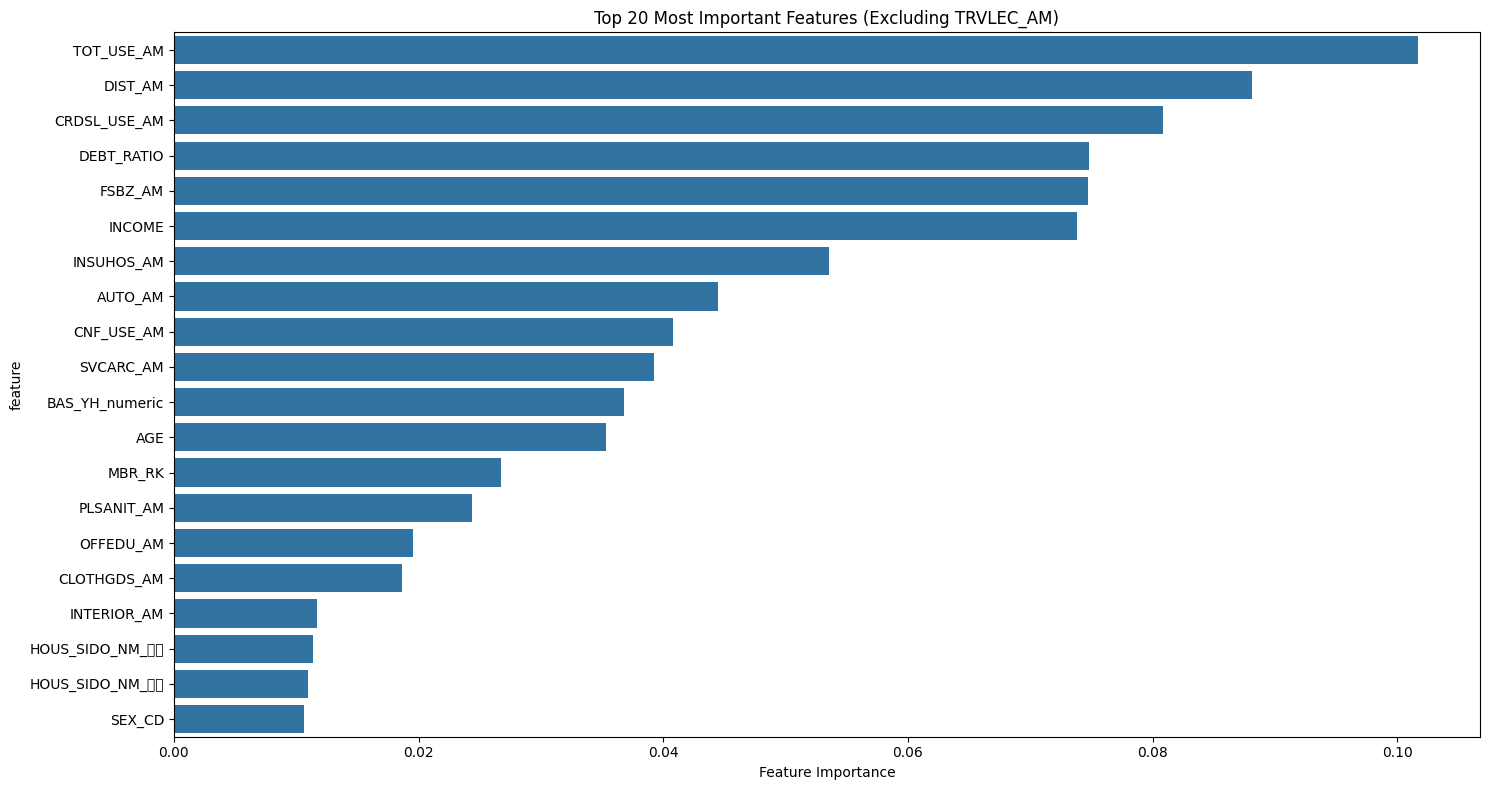

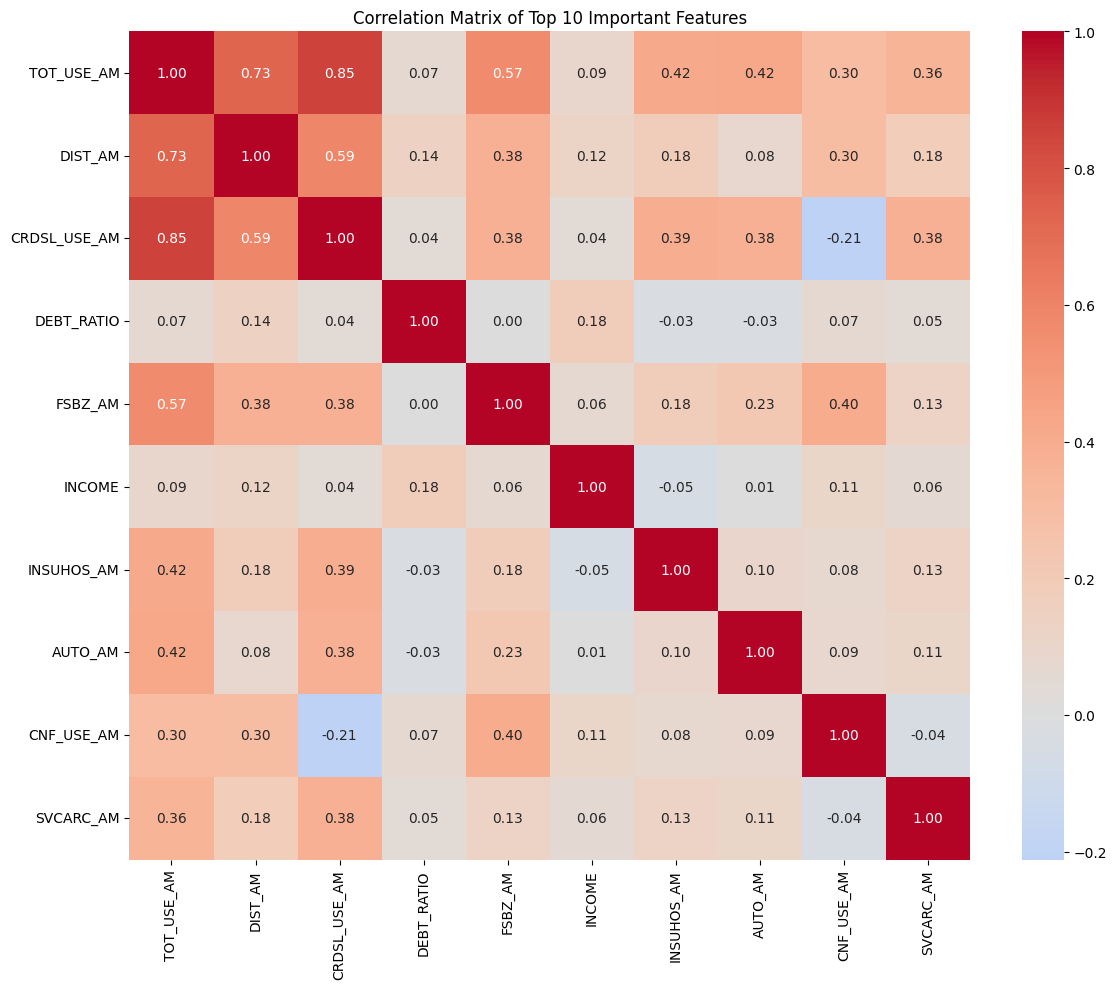

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# TRVLEC_AM 제외하고 X, y 분리
X = data_encoded.drop(['risk_score', 'TRVLEC_AM'], axis=1)
y = data_encoded['risk_score']

# 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X, y)

# 변수 중요도 계산
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
importance_df = importance_df.sort_values('importance', ascending=False)

# 상위 20개 변수 시각화
plt.figure(figsize=(15, 8))
sns.barplot(data=importance_df.head(20), x='importance', y='feature')
plt.title('Top 20 Most Important Features (Excluding TRVLEC_AM)')
plt.xlabel('Feature Importance')
plt.tight_layout()

# 상위 20개 변수와 중요도 점수 출력
print("상위 20개 중요 변수와 중요도 점수:")
print(importance_df.head(20))

# 상위 10개 변수들의 상관관계 분석
top_10_features = importance_df['feature'].head(10).tolist()
correlation_matrix = X[top_10_features].corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Top 10 Important Features')
plt.tight_layout()

# 변수 그룹화 (금액/재무/인구통계학적 특성 등)
def categorize_feature(feature_name):
    if '_AM' in feature_name:
        return '사용금액'
    elif feature_name in ['DEBT', 'INCOME', 'ASSETS', 'DEBT_RATIO', 'CRDSL_DEP']:
        return '재무지표'
    elif feature_name in ['AGE', 'SEX_CD', 'MBR_RK']:
        return '인구통계'
    elif 'LIFE_STAGE' in feature_name:
        return '생애주기'
    elif 'HOUS_SIDO' in feature_name:
        return '지역'
    elif 'DIGT_CHNL' in feature_name:
        return '디지털채널'
    else:
        return '기타'

top_20_grouped = importance_df.head(20).copy()
top_20_grouped['category'] = top_20_grouped['feature'].apply(categorize_feature)
grouped_importance = top_20_grouped.groupby('category')['importance'].sum().sort_values(ascending=False)

print("\n변수 그룹별 중요도 합계:")
print(grouped_importance)

# 추가: 상위 10개 변수들의 기술통계량
print("\n상위 10개 변수 기술통계량:")
print(X[top_10_features].describe())

VIF 값 (높은 순서대로):
        Variable        VIF
4         INCOME  11.690505
2     DEBT_RATIO   9.841897
1   CRDSL_USE_AM   8.745375
9            AGE   5.441460
0        DIST_AM   4.951136
7     CNF_USE_AM   3.545649
3        FSBZ_AM   2.820402
6        AUTO_AM   1.774667
5     INSUHOS_AM   1.749584
8      SVCARC_AM   1.540438
10    PLSANIT_AM   1.297835
11     OFFEDU_AM   1.200653

높은 상관관계를 가진 변수 쌍 (|상관계수| > 0.5):
INCOME - AGE: 0.599
DIST_AM - CRDSL_USE_AM: 0.591


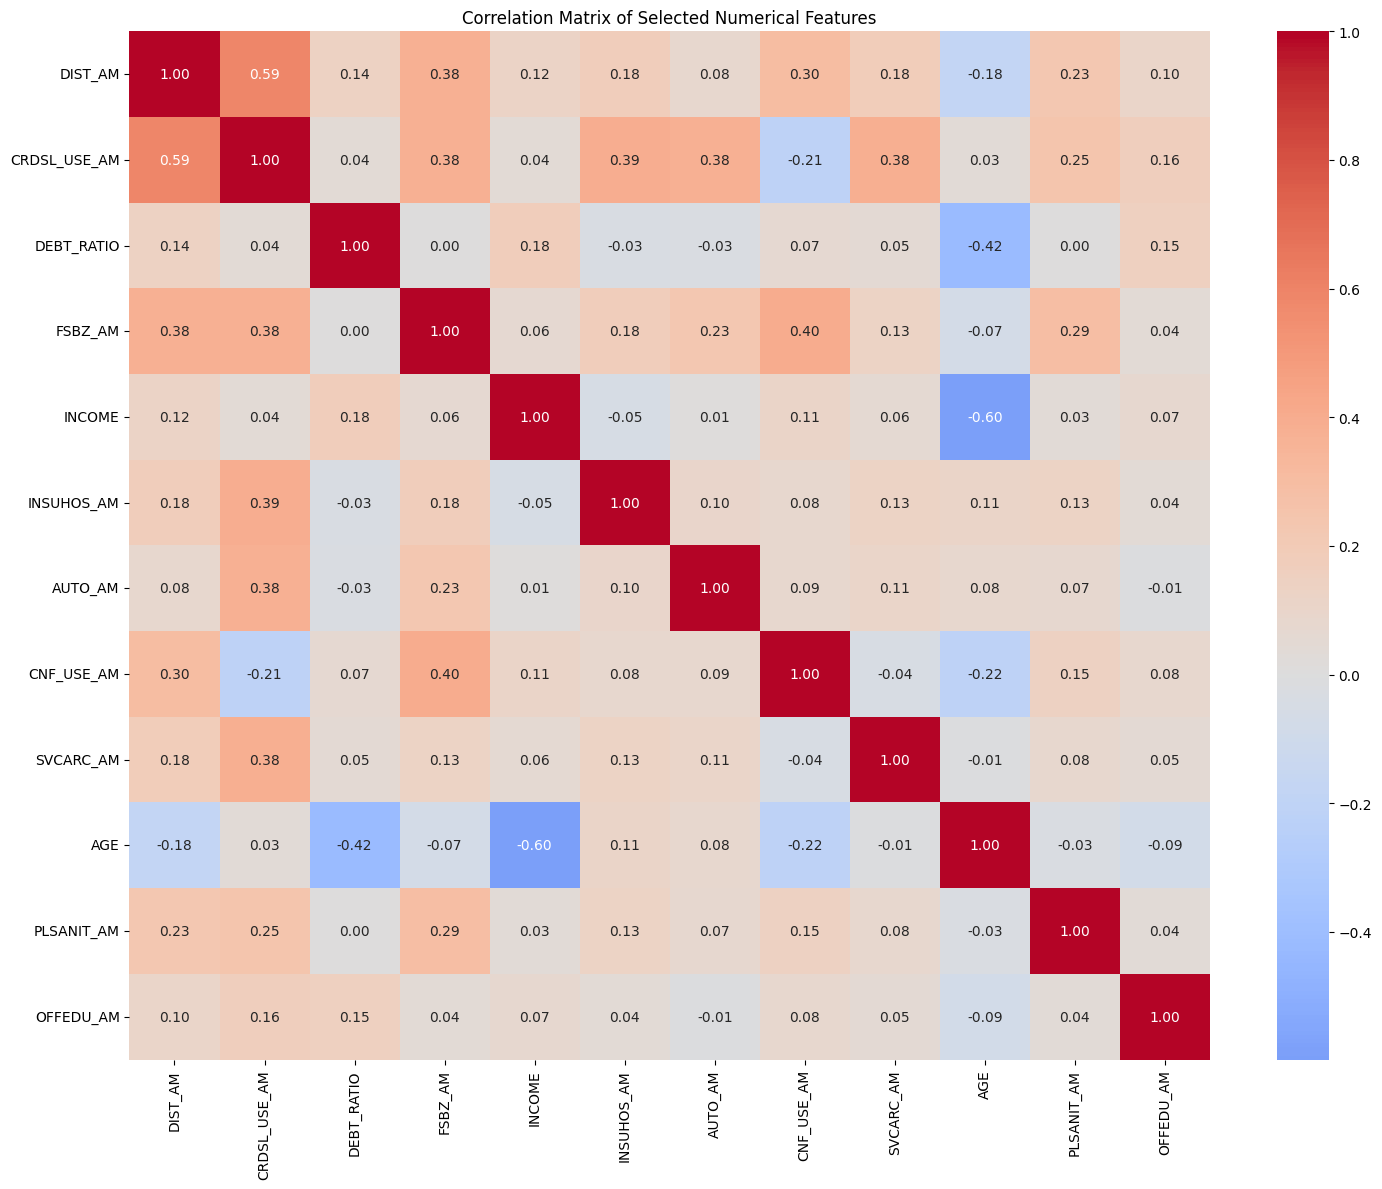

In [ ]:
# 중요도 상위 변수들 중 수치형 변수만 선택
numerical_features = [
    'DIST_AM', 'CRDSL_USE_AM', 'DEBT_RATIO',
    'FSBZ_AM', 'INCOME', 'INSUHOS_AM', 'AUTO_AM',
    'CNF_USE_AM', 'SVCARC_AM',
    'AGE', 'PLSANIT_AM', 'OFFEDU_AM'
]

# 제외 리스트
# 11  BAS_YH_numeric  987.381384
# 13          MBR_RK  771.517058
# 0     TOT_USE_AM  73.719495
# dept, asset, debt ratio로 갈음



# 선택된 변수들의 데이터프레임 생성
X_selected = data_encoded[numerical_features]

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = X_selected.columns
vif_data["VIF"] = [variance_inflation_factor(X_selected.values, i)
                   for i in range(X_selected.shape[1])]

print("VIF 값 (높은 순서대로):")
print(vif_data.sort_values('VIF', ascending=False))

# 상관관계 히트맵
plt.figure(figsize=(15, 12))
correlation_matrix = X_selected.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Selected Numerical Features')
plt.tight_layout()

# 변수들의 상관관계가 높은 쌍 찾기
high_correlation_pairs = []
for i in range(len(numerical_features)):
    for j in range(i+1, len(numerical_features)):
        corr = abs(correlation_matrix.iloc[i,j])
        if corr > 0.5:  # 상관계수 절대값 0.5 이상인 경우
            high_correlation_pairs.append({
                'var1': numerical_features[i],
                'var2': numerical_features[j],
                'correlation': corr
            })

print("\n높은 상관관계를 가진 변수 쌍 (|상관계수| > 0.5):")
for pair in sorted(high_correlation_pairs, key=lambda x: abs(x['correlation']), reverse=True):
    print(f"{pair['var1']} - {pair['var2']}: {pair['correlation']:.3f}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

def calculate_moving_averages(data, features, window_size):
    """한 번에 특정 윈도우 크기의 이동평균 계산"""
    df_ma = data[features].copy()
    for col in features:
        df_ma[f'{col}_MA{window_size}'] = data.groupby('SEQ')[col].transform(
            lambda x: x.rolling(window=window_size, min_periods=1).mean()
        )
    return df_ma

# 선택된 변수들
numerical_features = [
    'DIST_AM', 'CRDSL_USE_AM', 'DEBT_RATIO',
    'FSBZ_AM', 'INCOME', 'INSUHOS_AM', 'AUTO_AM',
    'CNF_USE_AM', 'SVCARC_AM',
    'AGE', 'PLSANIT_AM', 'OFFEDU_AM'
]

# 원하는 윈도우 크기 선택 (예: 3)
WINDOW_SIZE = 1  # 이 값을 1~7 사이에서 변경하여 사용

# 이동평균 계산 (한 번에 한 윈도우 크기만)
df_ma = calculate_moving_averages(data2, numerical_features, WINDOW_SIZE)

# 타겟 변수 (우량=0, 불량=1로 변환)
y = (data2['risk_score'] == '불량').astype(int)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    df_ma, y, test_size=0.2, random_state=42, stratify=y
)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# 성능 지표 출력
print(f"\n=== Window Size: {WINDOW_SIZE} ===")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# 변수 중요도 (절대값 기준)
feature_importance = pd.DataFrame({
    'feature': df_ma.columns,
    'importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\n변수 중요도:")
print(feature_importance)


=== Window Size: 1 ===

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    138056
           1       0.41      0.06      0.11      5946

    accuracy                           0.96    144002
   macro avg       0.69      0.53      0.54    144002
weighted avg       0.94      0.96      0.94    144002


ROC-AUC Score: 0.8719867909327699

변수 중요도:
             feature  importance
13  CRDSL_USE_AM_MA1    0.548373
1       CRDSL_USE_AM    0.548373
7         CNF_USE_AM    0.340421
19    CNF_USE_AM_MA1    0.340421
3            FSBZ_AM    0.169564
15       FSBZ_AM_MA1    0.169564
0            DIST_AM    0.164514
12       DIST_AM_MA1    0.164514
6            AUTO_AM    0.118750
18       AUTO_AM_MA1    0.118750
5         INSUHOS_AM    0.081479
17    INSUHOS_AM_MA1    0.081479
8          SVCARC_AM    0.072818
20     SVCARC_AM_MA1    0.072818
11         OFFEDU_AM    0.069913
23     OFFEDU_AM_MA1    0.069913
10        PLSANIT_AM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

def calculate_moving_averages(data, features, window_size):
    """한 번에 특정 윈도우 크기의 이동평균 계산"""
    df_ma = data[features].copy()
    for col in features:
        df_ma[f'{col}_MA{window_size}'] = data.groupby('SEQ')[col].transform(
            lambda x: x.rolling(window=window_size, min_periods=1).mean()
        )
    return df_ma

# 선택된 변수들
numerical_features = [
    'DIST_AM', 'CRDSL_USE_AM', 'DEBT_RATIO',
    'FSBZ_AM', 'INCOME', 'INSUHOS_AM', 'AUTO_AM',
    'CNF_USE_AM', 'SVCARC_AM',
    'AGE', 'PLSANIT_AM', 'OFFEDU_AM'
]

# 원하는 윈도우 크기 선택 (예: 3)
WINDOW_SIZE = 2  # 이 값을 1~7 사이에서 변경하여 사용

# 이동평균 계산 (한 번에 한 윈도우 크기만)
df_ma = calculate_moving_averages(data2, numerical_features, WINDOW_SIZE)

# 타겟 변수 (우량=0, 불량=1로 변환)
y = (data2['risk_score'] == '불량').astype(int)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    df_ma, y, test_size=0.2, random_state=42, stratify=y
)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# 성능 지표 출력
print(f"\n=== Window Size: {WINDOW_SIZE} ===")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# 변수 중요도 (절대값 기준)
feature_importance = pd.DataFrame({
    'feature': df_ma.columns,
    'importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\n변수 중요도:")
print(feature_importance)


=== Window Size: 2 ===

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    138056
           1       0.42      0.07      0.11      5946

    accuracy                           0.96    144002
   macro avg       0.69      0.53      0.55    144002
weighted avg       0.94      0.96      0.94    144002


ROC-AUC Score: 0.8744557323009519

변수 중요도:
             feature  importance
1       CRDSL_USE_AM    1.248594
7         CNF_USE_AM    1.097587
0            DIST_AM    0.534389
19    CNF_USE_AM_MA2    0.458991
15       FSBZ_AM_MA2    0.393693
5         INSUHOS_AM    0.284663
8          SVCARC_AM    0.223371
12       DIST_AM_MA2    0.217861
13  CRDSL_USE_AM_MA2    0.193040
11         OFFEDU_AM    0.163361
6            AUTO_AM    0.154195
17    INSUHOS_AM_MA2    0.128787
22    PLSANIT_AM_MA2    0.120126
16        INCOME_MA2    0.100544
20     SVCARC_AM_MA2    0.079348
18       AUTO_AM_MA2    0.077912
9                AGE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

def calculate_moving_averages(data, features, window_size):
    """한 번에 특정 윈도우 크기의 이동평균 계산"""
    df_ma = data[features].copy()
    for col in features:
        df_ma[f'{col}_MA{window_size}'] = data.groupby('SEQ')[col].transform(
            lambda x: x.rolling(window=window_size, min_periods=1).mean()
        )
    return df_ma

# 선택된 변수들
numerical_features = [
    'DIST_AM', 'CRDSL_USE_AM', 'DEBT_RATIO',
    'FSBZ_AM', 'INCOME', 'INSUHOS_AM', 'AUTO_AM',
    'CNF_USE_AM', 'SVCARC_AM',
    'AGE', 'PLSANIT_AM', 'OFFEDU_AM'
]

# 원하는 윈도우 크기 선택 (예: 3)
WINDOW_SIZE = 3  # 이 값을 1~7 사이에서 변경하여 사용

# 이동평균 계산 (한 번에 한 윈도우 크기만)
df_ma = calculate_moving_averages(data2, numerical_features, WINDOW_SIZE)

# 타겟 변수 (우량=0, 불량=1로 변환)
y = (data2['risk_score'] == '불량').astype(int)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    df_ma, y, test_size=0.2, random_state=42, stratify=y
)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# 성능 지표 출력
print(f"\n=== Window Size: {WINDOW_SIZE} ===")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# 변수 중요도 (절대값 기준)
feature_importance = pd.DataFrame({
    'feature': df_ma.columns,
    'importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\n변수 중요도:")
print(feature_importance)


=== Window Size: 3 ===

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    138056
           1       0.42      0.07      0.11      5946

    accuracy                           0.96    144002
   macro avg       0.69      0.53      0.55    144002
weighted avg       0.94      0.96      0.94    144002


ROC-AUC Score: 0.8751825721442958

변수 중요도:
             feature  importance
1       CRDSL_USE_AM    1.246759
7         CNF_USE_AM    1.028289
0            DIST_AM    0.500017
19    CNF_USE_AM_MA3    0.401595
15       FSBZ_AM_MA3    0.351952
5         INSUHOS_AM    0.282357
8          SVCARC_AM    0.205471
13  CRDSL_USE_AM_MA3    0.202439
12       DIST_AM_MA3    0.185546
6            AUTO_AM    0.165613
11         OFFEDU_AM    0.146048
17    INSUHOS_AM_MA3    0.130980
22    PLSANIT_AM_MA3    0.113283
16        INCOME_MA3    0.096382
18       AUTO_AM_MA3    0.064061
20     SVCARC_AM_MA3    0.060021
9                AGE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

def calculate_moving_averages(data, features, window_size):
    """한 번에 특정 윈도우 크기의 이동평균 계산"""
    df_ma = data[features].copy()
    for col in features:
        df_ma[f'{col}_MA{window_size}'] = data.groupby('SEQ')[col].transform(
            lambda x: x.rolling(window=window_size, min_periods=1).mean()
        )
    return df_ma

# 선택된 변수들
numerical_features = [
    'DIST_AM', 'CRDSL_USE_AM', 'DEBT_RATIO',
    'FSBZ_AM', 'INCOME', 'INSUHOS_AM', 'AUTO_AM',
    'CNF_USE_AM', 'SVCARC_AM',
    'AGE', 'PLSANIT_AM', 'OFFEDU_AM'
]

# 원하는 윈도우 크기 선택 (예: 3)
WINDOW_SIZE = 4  # 이 값을 1~7 사이에서 변경하여 사용

# 이동평균 계산 (한 번에 한 윈도우 크기만)
df_ma = calculate_moving_averages(data2, numerical_features, WINDOW_SIZE)

# 타겟 변수 (우량=0, 불량=1로 변환)
y = (data2['risk_score'] == '불량').astype(int)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    df_ma, y, test_size=0.2, random_state=42, stratify=y
)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# 성능 지표 출력
print(f"\n=== Window Size: {WINDOW_SIZE} ===")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# 변수 중요도 (절대값 기준)
feature_importance = pd.DataFrame({
    'feature': df_ma.columns,
    'importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\n변수 중요도:")
print(feature_importance)


=== Window Size: 4 ===

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    138056
           1       0.42      0.07      0.12      5946

    accuracy                           0.96    144002
   macro avg       0.69      0.53      0.55    144002
weighted avg       0.94      0.96      0.94    144002


ROC-AUC Score: 0.8757626696418896

변수 중요도:
             feature  importance
1       CRDSL_USE_AM    1.239135
7         CNF_USE_AM    0.996328
0            DIST_AM    0.477166
19    CNF_USE_AM_MA4    0.375494
15       FSBZ_AM_MA4    0.338434
5         INSUHOS_AM    0.275531
8          SVCARC_AM    0.207692
13  CRDSL_USE_AM_MA4    0.199105
6            AUTO_AM    0.169518
12       DIST_AM_MA4    0.160989
11         OFFEDU_AM    0.138541
17    INSUHOS_AM_MA4    0.123928
22    PLSANIT_AM_MA4    0.115920
16        INCOME_MA4    0.071600
20     SVCARC_AM_MA4    0.062707
18       AUTO_AM_MA4    0.058990
9                AGE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

def calculate_moving_averages(data, features, window_size):
    """한 번에 특정 윈도우 크기의 이동평균 계산"""
    df_ma = data[features].copy()
    for col in features:
        df_ma[f'{col}_MA{window_size}'] = data.groupby('SEQ')[col].transform(
            lambda x: x.rolling(window=window_size, min_periods=1).mean()
        )
    return df_ma

# 선택된 변수들
numerical_features = [
    'DIST_AM', 'CRDSL_USE_AM', 'DEBT_RATIO',
    'FSBZ_AM', 'INCOME', 'INSUHOS_AM', 'AUTO_AM',
    'CNF_USE_AM', 'SVCARC_AM',
    'AGE', 'PLSANIT_AM', 'OFFEDU_AM'
]

# 원하는 윈도우 크기 선택 (예: 3)
WINDOW_SIZE = 5  # 이 값을 1~7 사이에서 변경하여 사용

# 이동평균 계산 (한 번에 한 윈도우 크기만)
df_ma = calculate_moving_averages(data2, numerical_features, WINDOW_SIZE)

# 타겟 변수 (우량=0, 불량=1로 변환)
y = (data2['risk_score'] == '불량').astype(int)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    df_ma, y, test_size=0.2, random_state=42, stratify=y
)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# 성능 지표 출력
print(f"\n=== Window Size: {WINDOW_SIZE} ===")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# 변수 중요도 (절대값 기준)
feature_importance = pd.DataFrame({
    'feature': df_ma.columns,
    'importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\n변수 중요도:")
print(feature_importance)


=== Window Size: 5 ===

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    138056
           1       0.42      0.07      0.12      5946

    accuracy                           0.96    144002
   macro avg       0.69      0.53      0.55    144002
weighted avg       0.94      0.96      0.94    144002


ROC-AUC Score: 0.8759359688218672

변수 중요도:
             feature  importance
1       CRDSL_USE_AM    1.235442
7         CNF_USE_AM    0.973728
0            DIST_AM    0.464458
19    CNF_USE_AM_MA5    0.354380
15       FSBZ_AM_MA5    0.333514
5         INSUHOS_AM    0.275634
8          SVCARC_AM    0.205048
13  CRDSL_USE_AM_MA5    0.196623
6            AUTO_AM    0.167359
12       DIST_AM_MA5    0.146070
11         OFFEDU_AM    0.137513
17    INSUHOS_AM_MA5    0.126471
22    PLSANIT_AM_MA5    0.119950
18       AUTO_AM_MA5    0.062940
20     SVCARC_AM_MA5    0.060071
9                AGE    0.059484
16        INCOME_MA5

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

def calculate_moving_averages(data, features, window_size):
    """한 번에 특정 윈도우 크기의 이동평균 계산"""
    df_ma = data[features].copy()
    for col in features:
        df_ma[f'{col}_MA{window_size}'] = data.groupby('SEQ')[col].transform(
            lambda x: x.rolling(window=window_size, min_periods=1).mean()
        )
    return df_ma

# 선택된 변수들
numerical_features = [
    'DIST_AM', 'CRDSL_USE_AM', 'DEBT_RATIO',
    'FSBZ_AM', 'INCOME', 'INSUHOS_AM', 'AUTO_AM',
    'CNF_USE_AM', 'SVCARC_AM',
    'AGE', 'PLSANIT_AM', 'OFFEDU_AM'
]

# 원하는 윈도우 크기 선택 (예: 3)
WINDOW_SIZE = 6  # 이 값을 1~7 사이에서 변경하여 사용

# 이동평균 계산 (한 번에 한 윈도우 크기만)
df_ma = calculate_moving_averages(data2, numerical_features, WINDOW_SIZE)

# 타겟 변수 (우량=0, 불량=1로 변환)
y = (data2['risk_score'] == '불량').astype(int)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    df_ma, y, test_size=0.2, random_state=42, stratify=y
)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# 성능 지표 출력
print(f"\n=== Window Size: {WINDOW_SIZE} ===")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# 변수 중요도 (절대값 기준)
feature_importance = pd.DataFrame({
    'feature': df_ma.columns,
    'importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\n변수 중요도:")
print(feature_importance)


=== Window Size: 6 ===

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    138056
           1       0.42      0.07      0.12      5946

    accuracy                           0.96    144002
   macro avg       0.69      0.53      0.55    144002
weighted avg       0.94      0.96      0.94    144002


ROC-AUC Score: 0.8760321545081099

변수 중요도:
             feature  importance
1       CRDSL_USE_AM    1.236826
7         CNF_USE_AM    0.964172
0            DIST_AM    0.458657
19    CNF_USE_AM_MA6    0.347448
15       FSBZ_AM_MA6    0.329696
5         INSUHOS_AM    0.271051
8          SVCARC_AM    0.201688
13  CRDSL_USE_AM_MA6    0.201317
6            AUTO_AM    0.170073
12       DIST_AM_MA6    0.141152
11         OFFEDU_AM    0.137644
17    INSUHOS_AM_MA6    0.122791
22    PLSANIT_AM_MA6    0.117885
9                AGE    0.068196
18       AUTO_AM_MA6    0.059055
20     SVCARC_AM_MA6    0.056346
3            FSBZ_AM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

def calculate_moving_averages(data, features, window_size):
    """한 번에 특정 윈도우 크기의 이동평균 계산"""
    df_ma = data[features].copy()
    for col in features:
        df_ma[f'{col}_MA{window_size}'] = data.groupby('SEQ')[col].transform(
            lambda x: x.rolling(window=window_size, min_periods=1).mean()
        )
    return df_ma

# 선택된 변수들
numerical_features = [
    'DIST_AM', 'CRDSL_USE_AM', 'DEBT_RATIO',
    'FSBZ_AM', 'INCOME', 'INSUHOS_AM', 'AUTO_AM',
    'CNF_USE_AM', 'SVCARC_AM',
    'AGE', 'PLSANIT_AM', 'OFFEDU_AM'
]

# 원하는 윈도우 크기 선택 (예: 3)
WINDOW_SIZE = 7  # 이 값을 1~7 사이에서 변경하여 사용

# 이동평균 계산 (한 번에 한 윈도우 크기만)
df_ma = calculate_moving_averages(data2, numerical_features, WINDOW_SIZE)

# 타겟 변수 (우량=0, 불량=1로 변환)
y = (data2['risk_score'] == '불량').astype(int)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    df_ma, y, test_size=0.2, random_state=42, stratify=y
)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# 성능 지표 출력
print(f"\n=== Window Size: {WINDOW_SIZE} ===")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# 변수 중요도 (절대값 기준)
feature_importance = pd.DataFrame({
    'feature': df_ma.columns,
    'importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\n변수 중요도:")
print(feature_importance)


=== Window Size: 7 ===

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    138056
           1       0.41      0.07      0.12      5946

    accuracy                           0.96    144002
   macro avg       0.69      0.53      0.55    144002
weighted avg       0.94      0.96      0.94    144002


ROC-AUC Score: 0.8760633709703609

변수 중요도:
             feature  importance
1       CRDSL_USE_AM    1.238492
7         CNF_USE_AM    0.957607
0            DIST_AM    0.456399
19    CNF_USE_AM_MA7    0.341133
15       FSBZ_AM_MA7    0.324264
5         INSUHOS_AM    0.269169
13  CRDSL_USE_AM_MA7    0.203966
8          SVCARC_AM    0.198939
6            AUTO_AM    0.171451
12       DIST_AM_MA7    0.140262
11         OFFEDU_AM    0.135977
17    INSUHOS_AM_MA7    0.121194
22    PLSANIT_AM_MA7    0.116747
9                AGE    0.074859
18       AUTO_AM_MA7    0.055747
3            FSBZ_AM    0.055147
20     SVCARC_AM_MA7

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

def calculate_moving_averages(data, features, window_size):
    """한 번에 특정 윈도우 크기의 이동평균 계산"""
    df_ma = data[features].copy()
    for col in features:
        df_ma[f'{col}_MA{window_size}'] = data.groupby('SEQ')[col].transform(
            lambda x: x.rolling(window=window_size, min_periods=1).mean()
        )
    return df_ma

def train_evaluate_model(X_train_scaled, X_test_scaled, y_train, y_test, sampling_ratio):
    """특정 비율의 SMOTE를 적용하여 모델 학습 및 평가"""
    # SMOTE 적용
    smote = SMOTE(sampling_strategy=sampling_ratio, random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    # 클래스 분포 확인
    print(f"\n=== SMOTE 비율 {sampling_ratio} ({100/(1+sampling_ratio):.1f}:{100*sampling_ratio/(1+sampling_ratio):.1f}) ===")
    print("SMOTE 후 클래스 분포:")
    print(pd.Series(y_train_resampled).value_counts(normalize=True))

    # 모델 학습
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train_resampled, y_train_resampled)

    # 예측
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    # 성능 평가
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

    return model, y_pred_proba

# 기본 데이터 준비
numerical_features = [
    'DIST_AM', 'CRDSL_USE_AM', 'DEBT_RATIO',
    'FSBZ_AM', 'INCOME', 'INSUHOS_AM', 'AUTO_AM',
    'CNF_USE_AM', 'SVCARC_AM',
    'AGE', 'PLSANIT_AM', 'OFFEDU_AM'
]

WINDOW_SIZE = 3
df_ma = calculate_moving_averages(data2, numerical_features, WINDOW_SIZE)
y = (data2['risk_score'] == '불량').astype(int)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    df_ma, y, test_size=0.2, random_state=42, stratify=y
)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 원본 데이터 클래스 분포 출력
print("원본 학습 데이터 클래스 분포:")
print(pd.Series(y_train).value_counts(normalize=True))

# 다양한 비율로 SMOTE 적용 및 평가
sampling_ratios = [0.25, 0.43, 0.67, 1.0]  # 80:20, 70:30, 60:40, 50:50에 해당하는 비율
results = {}

for ratio in sampling_ratios:
    model, y_pred_proba = train_evaluate_model(
        X_train_scaled, X_test_scaled, y_train, y_test, ratio
    )
    results[ratio] = {
        'model': model,
        'pred_proba': y_pred_proba
    }

# 결과 비교 표 생성
comparison_df = pd.DataFrame()
for ratio in sampling_ratios:
    y_pred = (results[ratio]['pred_proba'] >= 0.5).astype(int)
    precision = pd.Series(y_test)[y_pred == 1].mean()
    recall = pd.Series(y_test)[y_test == 1][y_pred[y_test == 1] == 1].count() / pd.Series(y_test)[y_test == 1].count()
    f1 = 2 * (precision * recall) / (precision + recall)
    auc = roc_auc_score(y_test, results[ratio]['pred_proba'])

    ratio_label = f"{100/(1+ratio):.1f}:{100*ratio/(1+ratio):.1f}"
    comparison_df[ratio_label] = [precision, recall, f1, auc]

comparison_df.index = ['Precision', 'Recall', 'F1-Score', 'AUC']
print("\n=== 모든 비율에 대한 성능 비교 ===")
print(comparison_df)

원본 학습 데이터 클래스 분포:
risk_score
0    0.958777
1    0.041223
Name: proportion, dtype: float64

=== SMOTE 비율 0.25 (80.0:20.0) ===
SMOTE 후 클래스 분포:
risk_score
0    0.800002
1    0.199998
Name: proportion, dtype: float64

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     77851
           1       0.25      0.42      0.31      3347

    accuracy                           0.93     81198
   macro avg       0.61      0.68      0.64     81198
weighted avg       0.94      0.93      0.93     81198

ROC-AUC Score: 0.8862400372522573

=== SMOTE 비율 0.43 (69.9:30.1) ===
SMOTE 후 클래스 분포:
risk_score
0    0.699301
1    0.300699
Name: proportion, dtype: float64

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     77851
           1       0.23      0.57      0.33      3347

    accuracy                           0.90     81198
   macro avg       0.60      0.74    